# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns; sns.set_theme(color_codes=True)
# set this so the 
%matplotlib inline

### Read the csv data into a pandas dataframe and display the first 5 samples

In [4]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [6]:
df.shape

(414, 8)

### What are the features available in the dataset?

In [19]:
df.columns[::].value_counts()

No                                        1
X1 transaction date                       1
X2 house age                              1
X3 distance to the nearest MRT station    1
X4 number of convenience stores           1
X5 latitude                               1
X6 longitude                              1
Y house price of unit area                1
dtype: int64

### Check if any features have missing data

In [6]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [7]:
X = df.drop(['Y house price of unit area'], axis=1)
X[:]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [8]:
y = df['Y house price of unit area']
y[:]

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Split the dataset into train and test data

In [9]:
# Split the dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
print(X_test.shape)
print(y_test.shape)

print(X_train.shape)
print(y_train.shape)

(83, 7)
(83,)
(331, 7)
(331,)


### Choose the model (Linear Regression)

In [11]:
from sklearn import linear_model as lm

### Create an Estimator object

In [12]:
regr = lm.LinearRegression(
    fit_intercept=True, normalize=True, copy_X=True, n_jobs=None
)

### Train the model

In [13]:
regr.fit(X_train, y_train)

/Users/sertanavdan/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

### Apply the model

In [14]:
# Apply the model
y_pred = regr.predict(X_test)
y_pred[:20]

array([34.59222454, 47.58673483, 20.9226481 , 12.49402832, 43.11887361,
       34.53739706, 30.94528506, 45.32577595, 38.04839075, 13.90217198,
       11.89791644, 38.52611287, 31.88063097, 45.37604685, 50.84658168,
       36.2862735 , 44.41072387, 45.22203001, 30.05273304, 43.75888331])

### Display the coefficients

In [15]:
regr.coef_

array([-1.09659640e-03,  5.69815368e+00, -2.49757004e-01, -4.94908683e-03,
        1.07369954e+00,  2.26802763e+02, -3.62816002e+01])

### Find how well the trained model did with testing data

In [16]:
# Find how well the trained model did with testing data
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error: %.4f' % mean_squared_error(y_test, y_pred))
print('r2 Score: %.4f' % r2_score(y_test, y_pred))

Mean squared error: 44.5949
r2 Score: 0.7062


### Plot House Age Vs Price
#### Hint: Use regplot in sns

/Users/sertanavdan/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X2 house age', ylabel='Y house price of unit area'>

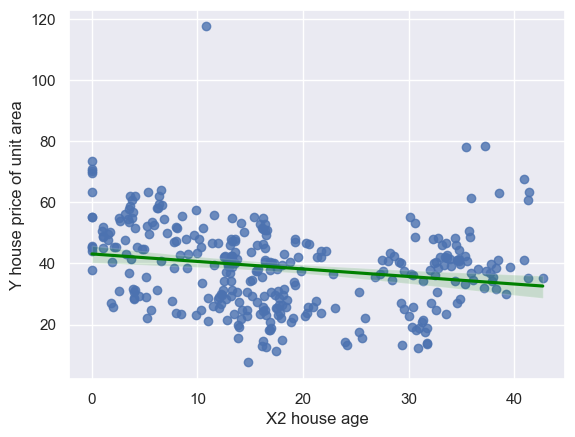

In [17]:
sns.regplot(X_train['X2 house age'], y_train, data=regr, line_kws={"color": "green"})

### Plot Distance to MRT station Vs Price

<AxesSubplot:xlabel='Y house price of unit area', ylabel='X3 distance to the nearest MRT station'>

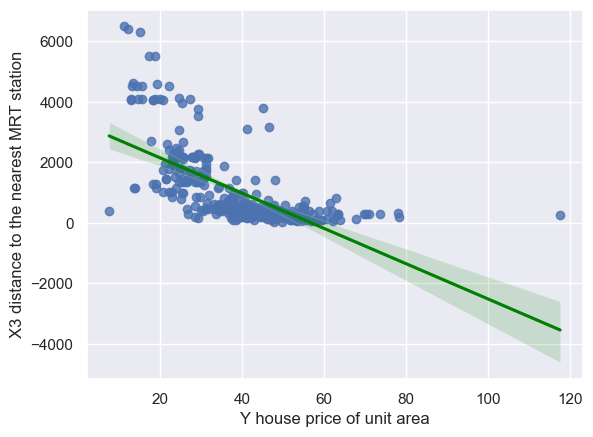

In [18]:
sns.regplot(y_train, X_train['X3 distance to the nearest MRT station'], data=regr, line_kws={"color": "green"})

### Plot Number of Convienience Stores Vs Price

<AxesSubplot:xlabel='Y house price of unit area', ylabel='X4 number of convenience stores'>

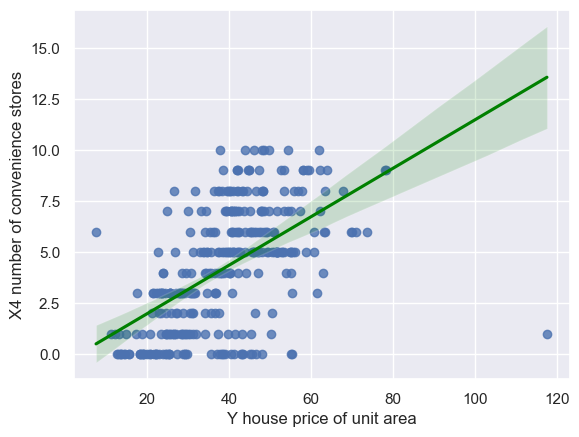

In [19]:
sns.regplot(y_train, X_train['X4 number of convenience stores'], data=regr, line_kws={"color": "green"})